In [4]:
import sys

import pandas as pd
import numpy as np
import numdifftools as ndt
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.dates import DateFormatter

from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import truncnorm
from scipy.stats import vonmises
from scipy.stats import multivariate_normal
from scipy.stats import gaussian_kde
from scipy.stats import circstd
from scipy.special import iv
from scipy.special import expit
from scipy.special import logit
from scipy.special import logsumexp
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
from scipy.optimize import LinearConstraint
from scipy.signal import convolve
from scipy.interpolate import interp1d
from scipy.linalg import block_diag

from datetime import datetime
from time import gmtime, strftime

from math import isclose
from copy import deepcopy
from itertools import product
import importlib
import time
import pickle
import random

import helper_funcs
import HHMM
import optimizor
import stoch_optimizor

np.random.seed(0)
random.seed(0)

In [5]:
date = "Sep-25-2022"
#param_folder = "/Users/evsi8432/Documents/Research/sublinear-HMM-inference/params/sim_study/Aug-16-2022"
param_folder = "/Volumes/One Touch/sublinear-HMM-inference/sim_study/" + date

methods = ["BFGS","SAGA","SVRG","GD","CG"]
T = 100000
K = 3
d = 3
partial_Es = [0,0.5,1]

tol = 1e-3

optims = {}
times_to_converge = {}
epochs_to_converge = {}
lls = {}

#"experiment_1_2022-08-05_20-27-39"
#"experiment_1_2022-08-05_20-26-58"
#"experiment_1_2022-08-05_20-26-22"
#"experiment_1_2022-08-05_20-25-49"
#"experiment_1_2022-08-05_20-25-36"
#"experiment_1_2022-08-05_20-27-53"
#"experiment_1_2022-08-05_20-25-18"
#"experiment_1_2022-08-05_20-25-12"

#with open("../params/experiment_1_2022-08-05_20-25-49","rb") as f:
#    optims = pickle.load(f)
    

In [9]:
for method in methods:
    for partial_E in partial_Es:
        if method in ["BFGS","CG","GD","control"] and partial_E > 0.0:
            pass
        else:
            
            # get best ll
            best_ll = -np.infty
            best_fname = param_folder + "/T-%d_K-%d-1_d-%d_%s_%.1f_%03d" % (T,K,d,method,partial_E,0)
            
            # initialize lls
            lls[(method,partial_E)] = []
            
            # initialize epochs
            epochs_to_converge[(method,partial_E)] = []
            
            # initialize times
            times_to_converge[(method,partial_E)] = []
            
            for rand_seed in range(100):
                
                fname = param_folder + "/T-%d_K-%d-1_d-%d_%s_%.1f_%03d" % (T,K,d,method,partial_E,rand_seed)
                
                try:
                    with open(fname, 'rb') as f:
                        optim = pickle.load(f)
                    print("loaded file %s" % fname)
                except:
                    print("file %s does not exist" % fname)
                    continue
                
                # check for some issue (likely nan in theta)
                if len(optim.time_trace) == 0:
                    print("file %s didn't optimize." % fname)
                    continue
                    
                
                # get convergence ind
                converge_ind = min(np.where(np.array(optim.grad_norm_trace) < tol)[0],
                                   default=len(optim.grad_norm_trace)-1)
                
                epochs_to_converge[(method,partial_E)].append(optim.epoch_trace[converge_ind])
                times_to_converge[(method,partial_E)].append(optim.time_trace[converge_ind])
                lls[(method,partial_E)].append(optim.log_like_trace[converge_ind])
                
                if optim.log_like_trace[-1] > best_ll:    
                    optims[(method,partial_E)] = optim
                    best_fname = fname
                    best_ll = optim.log_like_trace[-1]
                    
            print(best_fname)

loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_BFGS_0.0_000
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_BFGS_0.0_001
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_BFGS_0.0_002
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_BFGS_0.0_003
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_BFGS_0.0_004
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_BFGS_0.0_005
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_BFGS_0.0_006
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_BFGS_0.0_007
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_BFGS_0.0_008
loaded file /Volume

loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.0_008
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.0_009
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.0_010
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.0_011
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.0_012
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.0_013
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.0_014
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.0_015
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.0_016
loaded file /Volume

loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.5_009
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.5_010
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.5_011
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.5_012
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.5_013
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.5_014
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.5_015
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.5_016
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_0.5_017
loaded file /Volume

loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_1.0_006
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_1.0_007 does not exist
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_1.0_008
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_1.0_009 does not exist
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_1.0_010 does not exist
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_1.0_011 does not exist
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_1.0_012 does not exist
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SAGA_1.0_013 does not exist
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K

loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.0_000
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.0_001
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.0_002
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.0_003
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.0_004
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.0_005
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.0_006
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.0_007
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.0_008
loaded file /Volume

loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.5_001
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.5_002
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.5_003
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.5_004
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.5_005
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.5_006
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.5_007
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.5_008
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_0.5_009
loaded file /Volume

loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_1.0_001
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_1.0_002
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_1.0_003 does not exist
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_1.0_004 does not exist
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_1.0_005
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_1.0_006
file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_1.0_007 does not exist
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_1.0_008
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_SVRG_1.0

loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_GD_0.0_001
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_GD_0.0_002
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_GD_0.0_003
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_GD_0.0_004
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_GD_0.0_005
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_GD_0.0_006
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_GD_0.0_007
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_GD_0.0_008
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_GD_0.0_009
loaded file /Volumes/One Touch/sublin

loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_CG_0.0_000
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_CG_0.0_001
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_CG_0.0_002
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_CG_0.0_003
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_CG_0.0_004
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_CG_0.0_005
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_CG_0.0_006
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_CG_0.0_007
loaded file /Volumes/One Touch/sublinear-HMM-inference/sim_study/Sep-25-2022/T-100000_K-3-1_d-3_CG_0.0_008
loaded file /Volumes/One Touch/sublin

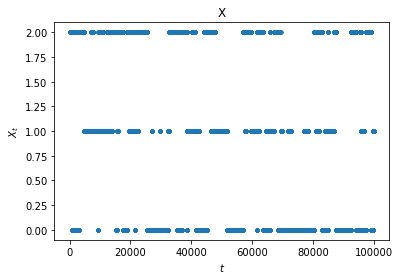

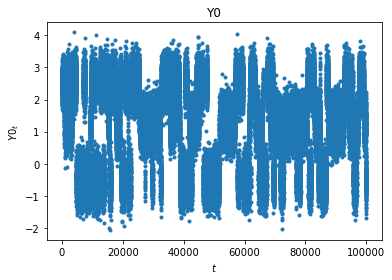

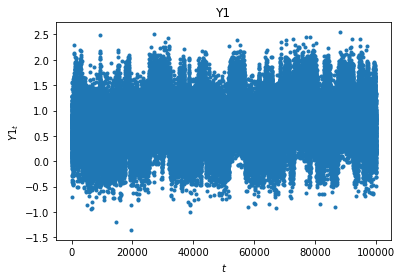

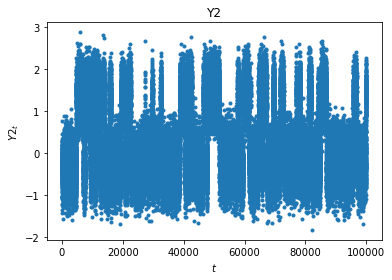

In [10]:
# plot hidden states
with open("../dat/data_X_T-%d_K-%d-1_d-%d"%(T,K,d),"rb") as f:
    data_x = pickle.load(f)
plt.plot([x for x in data_x],'.')  
plt.xlabel(r"$t$")
plt.ylabel(r"$X_t$")
plt.title("X")
plt.show()

# plot data
with open("../dat/data_Y_T-%d_K-%d-1_d-%d"%(T,K,d),"rb") as f:
    data_y = pickle.load(f)    
for key in data_y[0]:
    plt.plot([x[key] for x in data_y],'.')
    plt.xlabel(r"$t$")
    plt.ylabel(r"$%s_t$"%key)
    plt.title(key)
    plt.show()
    
# get true paramters
with open("../dat/data_P_T-%d_K-%d-1_d-%d"%(T,K,d),"rb") as f:
    true_params = pickle.load(f)
    #true_eta = Gamma_2_eta(true_Gamma)
    #true_eta0 = delta_2_eta0(true_delta)

('BFGS', 0)


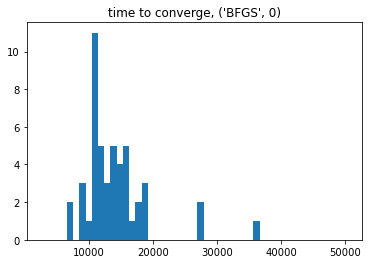

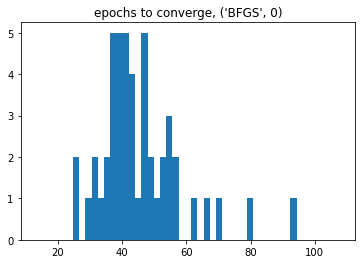

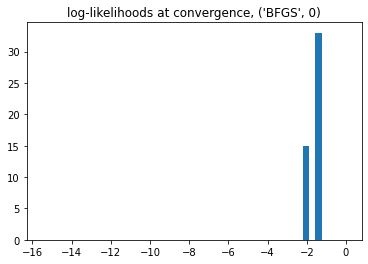

('SAGA', 0)


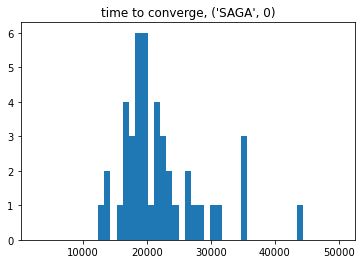

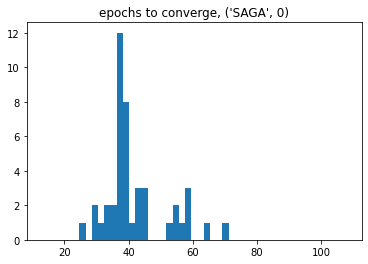

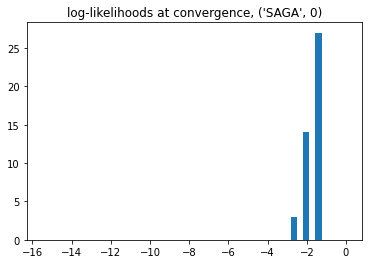

('SAGA', 0.5)


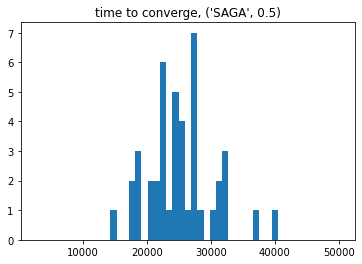

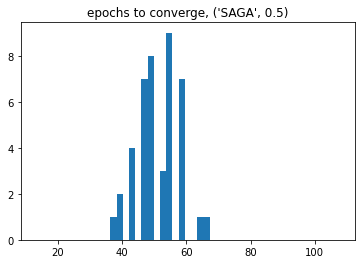

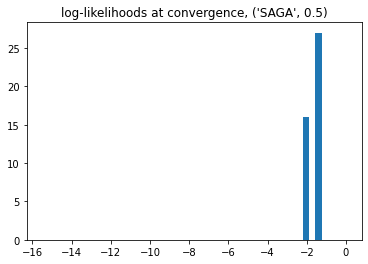

('SAGA', 1)


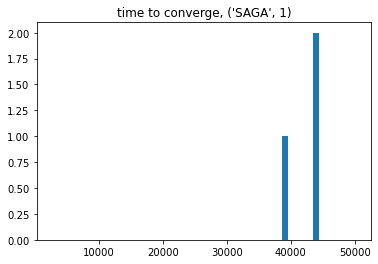

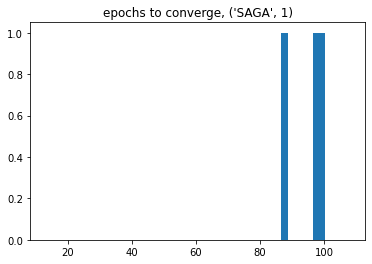

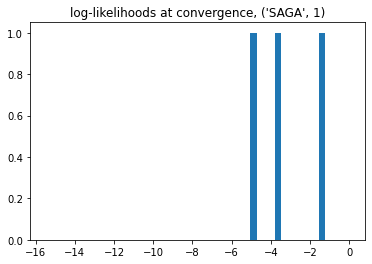

('SVRG', 0)


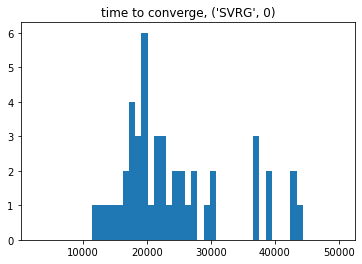

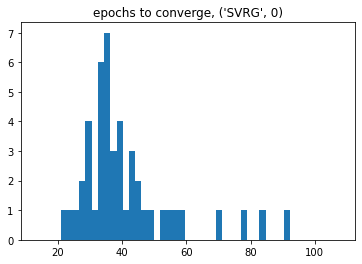

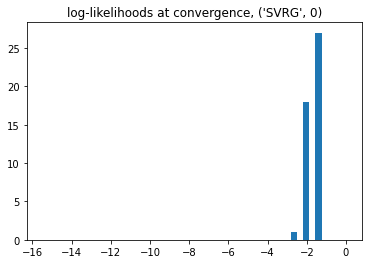

('SVRG', 0.5)


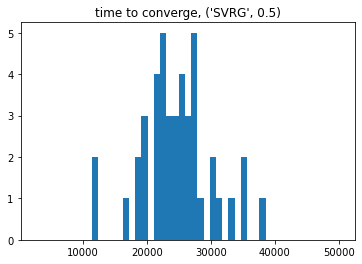

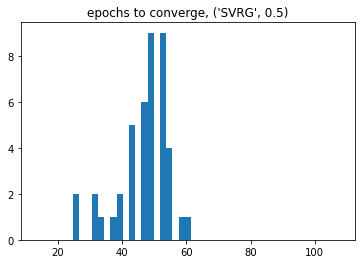

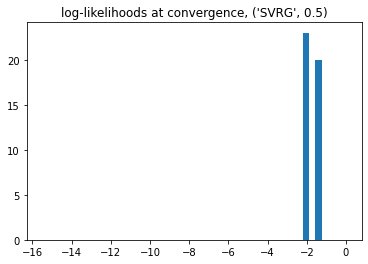

('SVRG', 1)


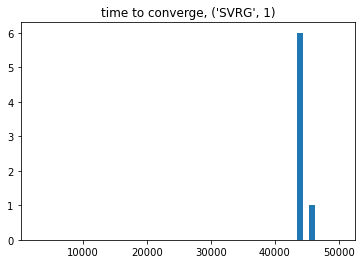

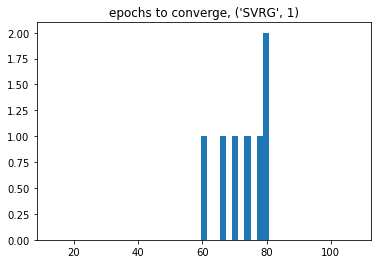

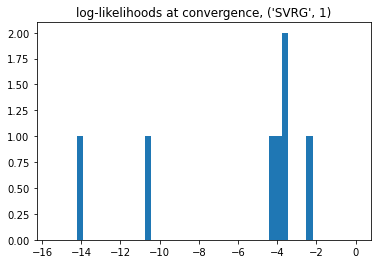

('GD', 0)


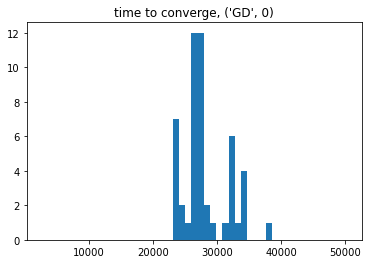

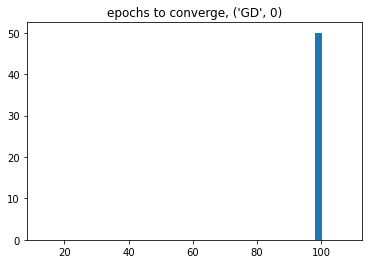

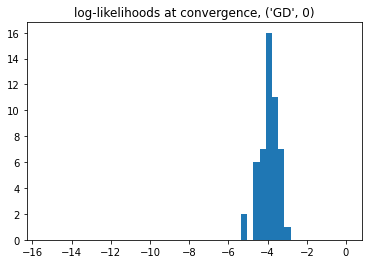

('CG', 0)


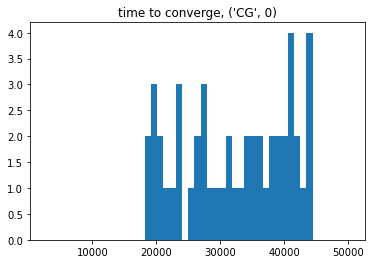

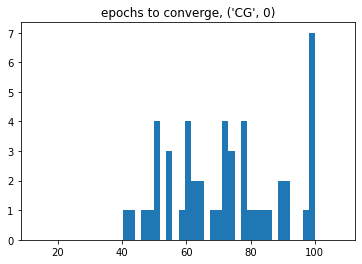

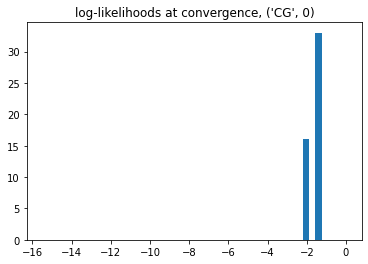

In [11]:
# get min and max time
def get_bins(dictionary,nbins):
    mini = np.infty
    maxi = -np.infty
    for key,values in dictionary.items():
        if len(values) == 0:
            continue
        if mini > min(values):
            mini = min(values)
        if maxi < max(values):
            maxi = max(values)
    return np.linspace(mini - 0.1*(maxi-mini),maxi + 0.1*(maxi-mini),nbins)

        
for key in optims:
    
    print(key)
    
    if key == "control":
        continue
        
    plt.hist(times_to_converge[key],
             bins=get_bins(times_to_converge,50))
    plt.title("time to converge, %s" % str(key))
    plt.show()
    
    plt.hist(epochs_to_converge[key],
             bins=get_bins(epochs_to_converge,50))
    plt.title("epochs to converge, %s" % str(key))
    plt.show()
    
    plt.hist(lls[key],
             bins=get_bins(lls,50))
    plt.title("log-likelihoods at convergence, %s" % str(key))
    plt.show()

# Plot Results

In [12]:
methods = ["BFGS","SAGA","SVRG","CG","GD"]

ll_star = optims["control"].log_like_trace[-1]
for key in optims:
    if ll_star < optims[key].log_like_trace[-1]:
        print("control model has lower likelihood than test model")
        ll_star = optims[key].log_like_trace[-1]
optims["control"].features[1]
        
true_mus = true_params['mus']
true_sigs = true_params['sigs']

def plot_ll(optims,x_time=False,xlims=None,ylims=None):
    
    legend = []
    
    for method in methods:
        
        for partial_E in [0,0.5,1]:
            
            PE = (partial_E == 0.5) or (partial_E == 1)
            M = int(partial_E == 0) + int(partial_E == 0.5) + 10*(partial_E == 1)
            
            if (method,partial_E) in optims:
                
                optim = optims[(method,partial_E)]
                if x_time:
                    plt.plot(optim.time_trace,np.log10(ll_star-optim.log_like_trace))
                else:
                    plt.plot(optim.epoch_trace,np.log10(ll_star-optim.log_like_trace))    
                title = method 
                if partial_E:
                    title += ", partial E"
                else:
                    title += ", no partial E"
                title += ", M = %dT" % M
                
                legend.append(title)
                
    plt.ylabel(r"$\log_{10}\left[\log p(\mathbf{y} ; \theta^*, \eta^*) - \log p(\mathbf{y} ; \theta, \eta)\right]$")
    plt.legend(legend)
    if x_time:
        plt.xlabel("Seconds of Computation")
        plt.savefig("../plt/log-like_v_time_T-%d_K-%d-1_d-%d.png"%(T,K,d),dpi=500)
    else:
        plt.xlabel("Epoch")
        plt.savefig("../plt/log-like_v_epoch_T-%d_K-%d-1_d-%d.png"%(T,K,d),dpi=500)
        
    if not xlims is None:
        plt.xlim(xlims)
    if not ylims is None:
        plt.ylim(ylims)
        
    plt.show()
                
    return

def plot_results(optim,ll_star,method,partial_E,M,features,iters=None):
    
    title = method 
    if partial_E:
        title += ", partial E-step"
    else:
        title += ", no partial E"
    title += ", M = %dT" % M
    
    if iters is None:
        iters=len(optim.theta_trace)
        
    x = optim.epoch_trace
    
    # plot log of gradient of log-likelihood
    plt.plot(np.log10(optim.grad_norm_trace))
    plt.axhline(-3, c = 'k', linestyle = "--")
    plt.title(r"$\log_{10}$ of Gradient Norm v Epoch, %s" % title)
    plt.xlabel("Epoch (k)")
    plt.ylabel(r"$\log ||\widehat \nabla_\theta F^{(k,m)} + \widehat \nabla_\eta G^{(k,m)}||$")
    plt.savefig("../plt/grad-hat-ll-%s-%s-T-%d_K-%d-1_d-%d.png"%(method,partial_E,T,K,d),dpi=300)
    plt.show()

    for feature in features:
        
        # plot means
        legend = []
        for k0 in range(optim.K[0]):
            for k1 in range(optim.K[1]):
                plt.plot(x,[optim.theta_trace[t][1][k0][feature]['mu'][k1] for t in range(len(optim.theta_trace))])
                legend.append(r"$\mu^{(%d,%d)}$"%(k0+1,k1+1))
                
        # plot true means
        for mu in true_mus[feature]:
            plt.axhline(mu, c = 'k', linestyle = "--")

        plt.title(feature + r" $\mu$ v Epoch, %s" % title)
        plt.xlabel("Epoch")
        plt.legend(legend)
        plt.savefig("../plt/mu-%s-%s-%d-T-%d_K-%d-1_d-%d.png"%(method,partial_E,M,T,K,d),dpi=500)
        plt.show()

        # plot log(sigma)
        legend = []
        for k0 in range(optim.K[0]):
            for k1 in range(optim.K[1]):
                plt.plot(x,[optim.theta_trace[t][1][k0][feature]['log_sig'][k1] for t in range(len(optim.theta_trace))])
                legend.append(r"$\log\left(\sigma^{(%d,%d)}\right)$"%(k0+1,k1+1))
        
        # plot true log(sigmas)
        for sig in true_sigs[feature]:
            plt.axhline(np.log(sig), c = 'k', linestyle = "--")

        plt.title(feature + r" $\log\left(\sigma\right)$ v Epoch, %s" % title)
        plt.xlabel("Epoch")
        plt.legend(legend)
        plt.savefig("../plt/log-sig-%s-%s-%d-T-%d_K-%d-1_d-%d.png"%(method,partial_E,M,T,K,d),dpi=500)
        plt.show()
    
    # plot eta_coarse
    legend = []
    for k in range(optim.K[0]):
        for l in range(optim.K[0]):
            if k != l:
                plt.plot(x,[optim.eta_trace[i][0][k,l] for i in range(len(optim.eta_trace))])
                legend.append(r"$\eta^{(%d,%d)}$" % (k+1,l+1))
    plt.title(r"$\eta$ v Epoch, %s" % title)
    plt.xlabel("Epoch")
    plt.legend(legend)
    plt.savefig("../plt/eta-%s-%s-%d-T-%d_K-%d-1_d-%d.png"%(method,partial_E,M,T,K,d),dpi=500)
    plt.show()
    
    # plot eta_fine
    legend = []
    for k0 in range(optim.K[0]):
        for i in range(optim.K[1]):
            for j in range(optim.K[1]):
                if i != j:
                    plt.plot(x,[optim.eta_trace[t][1][k0][i,j] for t in range(len(optim.eta_trace))])
                    legend.append(r"$\eta_%d^{*(%d,%d)}$" % (k0,i+1,j+1))
    plt.title(r"$\eta^*$ v Epoch, %s" % title)
    plt.xlabel("Epoch")
    plt.legend(legend)
    plt.savefig("../plt/eta-fine-%s-%s-%d-T-%d_K-%d-1_d-%d.png"%(method,partial_E,M,T,K,d),dpi=500)
    plt.show()
    
    #plt.plot([optim.grad_theta_trace[i][0]['Y']['log_sig'][0] for i in range(len(optim.theta_trace))])
    #plt.plot([optim.grad_theta_trace[i][0]['Y']['log_sig'][1] for i in range(len(optim.theta_trace))])
    #plt.plot([optim.grad_theta_trace[i][0]['Y']['log_sig'][2] for i in range(len(optim.theta_trace))])
    #plt.title("Gradients of Standard Deviations v iteration number")
    #plt.show()

KeyError: 'control'

In [ ]:
plot_ll(optims,x_time=True)#,xlims=[0,5000],ylims=[-6,2])
plot_ll(optims,x_time=False)#,xlims=[0,50],ylims=[-6,2])

In [ ]:
for method in methods:#["EM","SGD","SAG","SVRG","SAGA"]:
    for partial_E in [0,0.5,1]:
        PE = (partial_E == 0.5) or (partial_E == 1)
        M = int(partial_E == 0) + int(partial_E == 0.5) + 10*(partial_E == 1)
        if (method,partial_E) in optims:
            plot_results(optims[(method,partial_E)],
                         ll_star,method,PE,M,optims["control"].features[1])